# Plot proxies

This tutorial demonstrates how to visualize the loaded proxies in LMRt.

## Test data preparation

To go through this tutorial, please prepare test data following the steps:

1. Download the test case named "PAGES2k_CCSM4_GISTEMP" with this [link](https://drive.google.com/drive/folders/1UGn-LNd_tGSjPUKa52E6ffEM-ms2VD-N?usp=sharing).
2. Create a directory named "testcases" in the same directory where this notebook sits.
3. Put the unzipped direcotry "PAGES2k_CCSM4_GISTEMP" into "testcases".

Below, we first load some useful packages, including our `LMRt`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import os
import numpy as np
import pandas as pd
import xarray as xr

## Load configurations and the proxy database

In [2]:
job = LMRt.ReconJob()
job.load_configs(cfg_path='./testcases/PAGES2k_CCSM4_GISTEMP/configs.yml', verbose=True)
job.load_proxydb(verbose=True)

LMRt: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_CCSM4_GISTEMP/configs.yml
LMRt: job.load_configs() >>> job.configs created
LMRt: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon
LMRt: job.load_configs() >>> /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon created
{'anom_period': [1951, 1980],
 'job_dirpath': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/gistemp1200_ERSSTv4.nc'},
 'obs_varname': {'tas': 'tempanomaly'},
 'prior_path': {'tas': './data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc'},
 'prior_regrid_ntrunc': 42,
 'prior_season': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'prior_varname': {'tas': 'TREFHT'},
 'proxy_frac': 0.75,
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'psm_calib_period': [1850, 2

## Visualize the whole proxy database

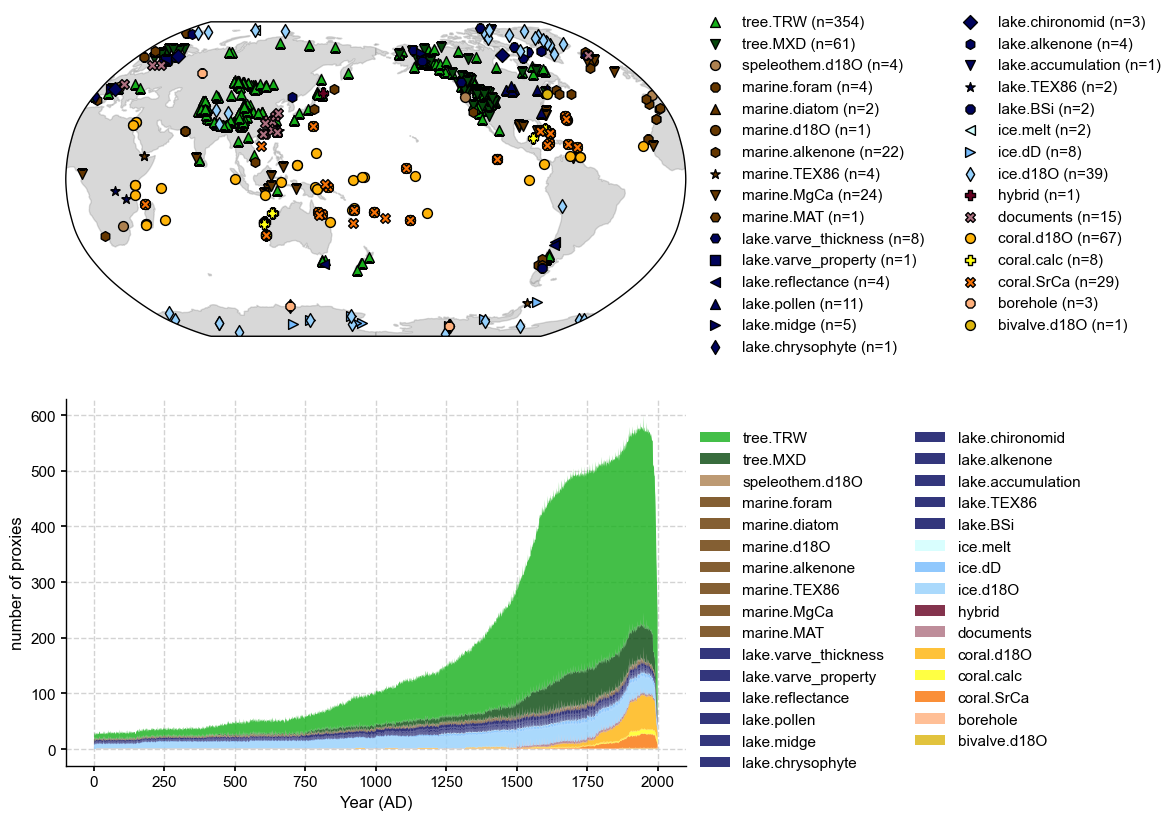

In [3]:
fig, ax = job.proxydb.plot()

## Visualize specific proxy types

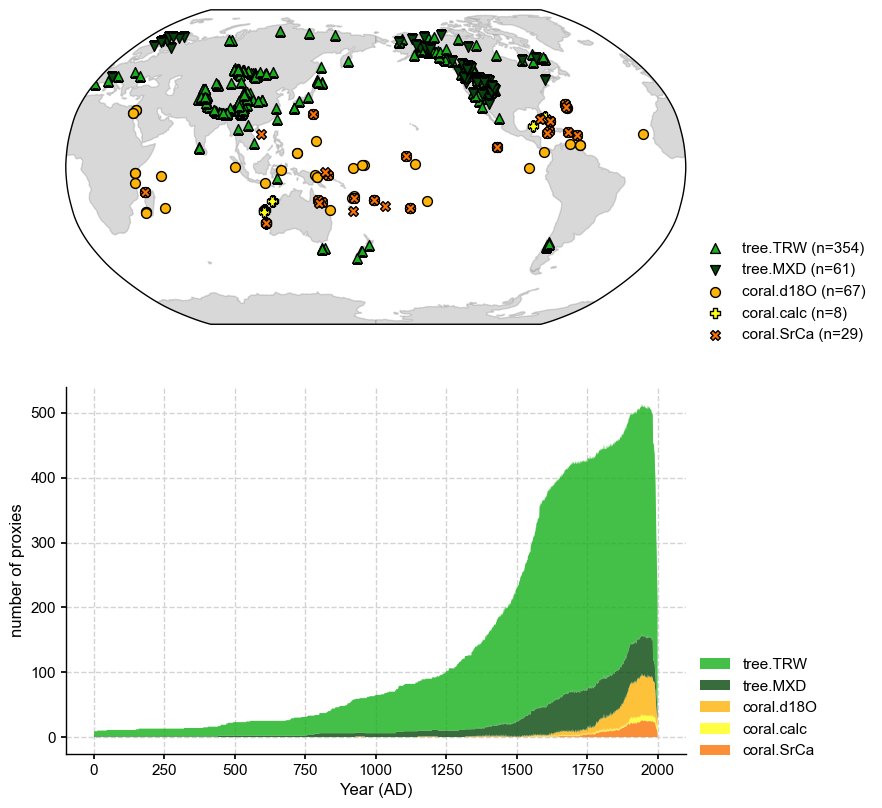

In [4]:
proxydb_mix = job.proxydb.filter_ptype(['coral.calc', 'coral.d18O', 'coral.SrCa', 'tree.TRW', 'tree.MXD'])
fig, ax = proxydb_mix.plot()

### Modify the markers and colors for specific proxy types

In case there are special proxy types for which we don't have a default marker & color style, or that we'd like to specify a style that is different from the default one, we may specify as the following:

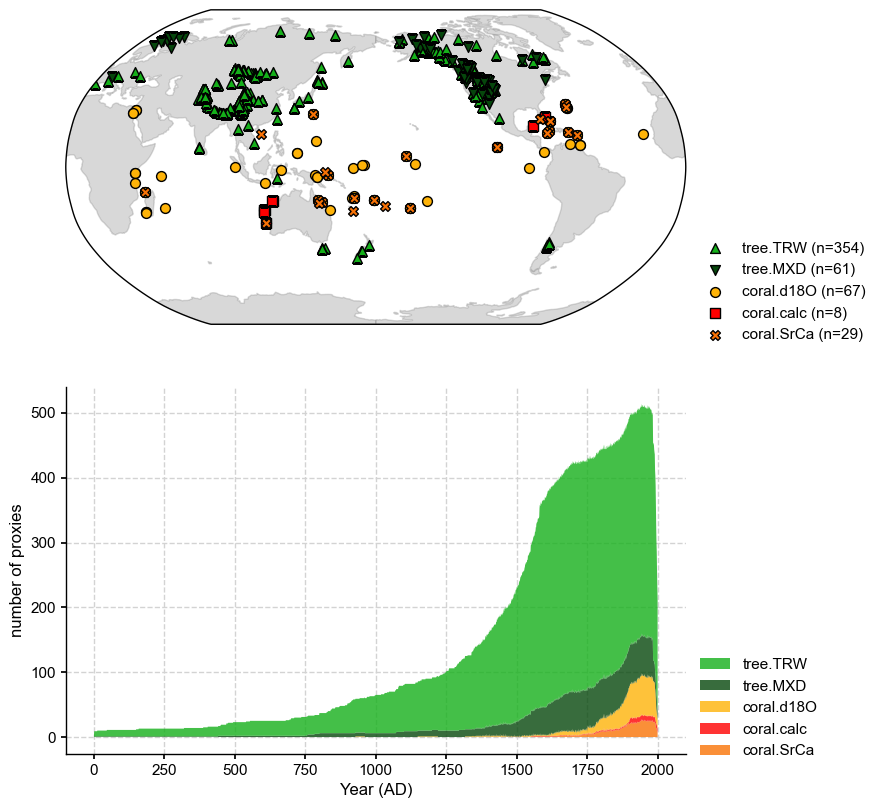

In [5]:
p2k = LMRt.visual.PAGES2k()

new_colors_dict = {'coral.calc': 'r'}
new_markers_dict = {'coral.calc': 's'}

p2k.colors_dict.update(new_colors_dict)
p2k.markers_dict.update(new_markers_dict)
    
fig, ax = proxydb_mix.plot(p=p2k)

## Visualize a specific proxy record

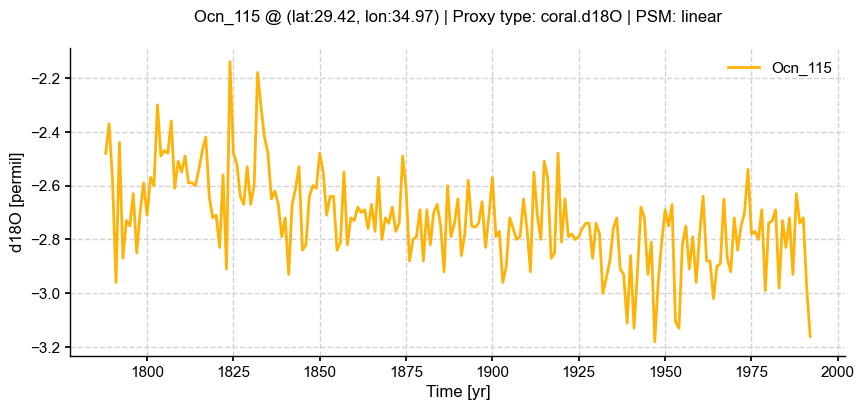

In [6]:
fig, ax = job.proxydb.records['Ocn_115'].plot()